# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [14]:
# Initial imports
import os
import pandas as pd
from newsapi import NewsApiClient
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [15]:
# Read your api key environment variable
load_dotenv()

api_key = os.getenv("news_api_key")

In [16]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [17]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news_en['totalResults']}")

# Show sample article
bitcoin_news_en["articles"][0]


Total articles about Bitcoin: 4581


{'source': {'id': None, 'name': 'Lifehacker.com'},
 'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
 'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
 'description': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…',
 'url': 'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png',
 'publishedAt': '2020-12-03T22:00:00Z',
 'content': 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]'}

In [18]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_news_en['totalResults']}")

# Show sample article
ethereum_news_en["articles"][0]

Total articles about Ethereum: 1256


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [20]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text

        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
2,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."
3,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."
4,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...


In [25]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text

        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...


In [26]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.205768,0.003947,0.942526,0.053526
std,0.262239,0.017206,0.075928,0.068179
min,0.000000,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.897500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.411700,0.000000,1.000000,0.102500
max,0.765000,0.075000,1.000000,0.174000


In [27]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.021050,0.918000,0.060950
std,0.320198,0.054473,0.105304,0.078682
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.876000,0.000000
50%,0.000000,0.000000,0.948000,0.052000
75%,0.261275,0.000000,1.000000,0.095250
max,0.877900,0.196000,1.000000,0.318000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score that indicates on average there is a greater positive sentiment about Ethereum based on the new articles.

Q: Which coin had the highest compound score?

A: While both coins had a compound score greater than .05 to indicate positive sentiment, Ethereum had the highest compound score of .877900.

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of .318000 that again indicates a greater positive sentiment.

Q. Which coin had the highest negative score?

A: Ethereum had the highest negative score of .196000 that indicates while it had the most news with positive sentiment as shown by the higher positive score it also had the most news with negative sentiment.


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [35]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [87]:
# Expand the default stopwords list if necessary
sw_addons = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'weekly', 'following', ',', '']

In [88]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
               
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words
    sw = set(stopwords.words('english') + sw_addons)
    
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in text]
    tokens = [word for word in lem if word not in sw]
    
    return tokens


In [89]:
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in bitcoin_df.text]
bitcoin_df['tokens'] = btc_tokens
bitcoin_df.head()


,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[visa, ha, partnered, cryptocurrency, startup,..."
1,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
2,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
3,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."
4,0.4404,0.075,0.773,0.152,If youve been watching the crypto markets over...,"[youve, watching, crypto, market, past, youll,..."


In [90]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in ethereum_df.text]
ethereum_df['tokens'] = eth_tokens
ethereum_df.head()


,Compound,Negative,Neutral,Positive,text,tokens
0,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,0.0000,0.0,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.4215,0.0,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
4,0.1779,0.0,0.948,0.052,NEW YORK (Reuters) - Institutional investors p...,"[new, york, reuters, institutional, investor, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [91]:
from collections import Counter
from nltk import ngrams

In [94]:
# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in bitcoin_df.tokens]
dict(bitcoin_bigram_counts[0].most_common(20))


{('visa', 'ha'): 1,
 ('ha', 'partnered'): 1,
 ('partnered', 'cryptocurrency'): 1,
 ('cryptocurrency', 'startup'): 1,
 ('startup', 'blockfi'): 1,
 ('blockfi', 'offer'): 1,
 ('offer', 'first'): 1,
 ('first', 'reward'): 1,
 ('reward', 'credit'): 1,
 ('credit', 'card'): 1,
 ('card', 'pay'): 1,
 ('pay', 'bitcoin'): 1,
 ('bitcoin', 'rather'): 1,
 ('rather', 'cash'): 1,
 ('cash', 'worth'): 1,
 ('worth', 'applying'): 1,
 ('applying', 'unless'): 1,
 ('unless', 'youre'): 1,
 ('youre', 'extremely'): 1,
 ('extremely', 'bullish'): 1}

In [95]:
# Generate the Ethereum N-grams where N=2 -OK
ethereum_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in ethereum_df.tokens]
dict(ethereum_bigram_counts[0].most_common(20))


{('paypal', 'bringing'): 1,
 ('bringing', 'newlyannounced'): 1,
 ('newlyannounced', 'support'): 1,
 ('support', 'cryptocurrency'): 1,
 ('cryptocurrency', 'u'): 1,
 ('u', 'account'): 1,
 ('account', 'first'): 1,
 ('first', 'plan'): 1,
 ('plan', 'open'): 1,
 ('open', 'cryptocurrency'): 1,
 ('cryptocurrency', 'trading'): 1,
 ('trading', 'usbased'): 1,
 ('usbased', 'user'): 1,
 ('user', 'october'): 1,
 ('october', 'wa'): 1,
 ('wa', 'char'): 1}

In [96]:
# Use the token_count function to generate the top 10 words from each coin - OK
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [101]:
# Get the top 10 words for Bitcoin
bitcoin_big_string = ' '.join(bitcoin_df['text'])
bitcoin_processed = tokenizer(bitcoin_big_string)
bitcoin_top_10 = token_count(bitcoin_processed)
bitcoin_top_10


[('char', 19),
 ('bitcoin', 13),
 ('currency', 9),
 ('reuters', 9),
 ('photo', 8),
 ('file', 7),
 ('representation', 7),
 ('virtual', 7),
 ('ha', 6),
 ('illustration', 6)]

In [105]:
# Get the top 10 words for Ethereum - OK
ethereum_big_string = ' '.join(ethereum_df['text'])
ethereum_processed = tokenizer(ethereum_big_string)
ethereum_top_10 = token_count(ethereum_processed)
ethereum_top_10


[('char', 20),
 ('reuters', 15),
 ('bitcoin', 14),
 ('photo', 10),
 ('currency', 10),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('reutersdado', 8),
 ('file', 7)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

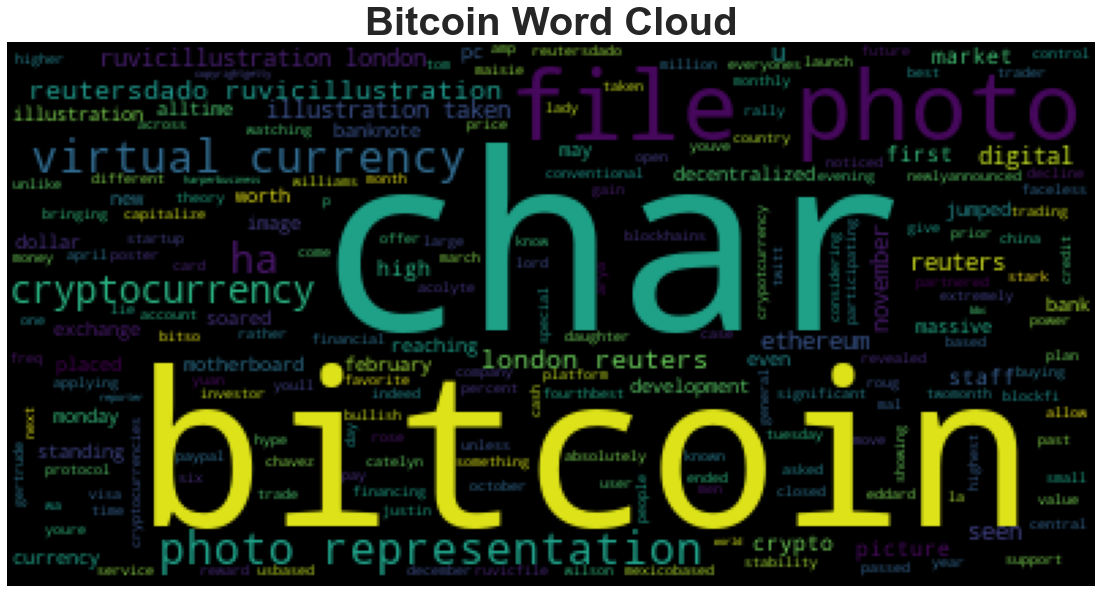

In [120]:
# Generate the Bitcoin word cloud
bitcoin_word_cloud = ' '.join(bitcoin_processed)
wc = WordCloud().generate(bitcoin_word_cloud)
plt.title('Bitcoin Word Cloud', fontsize=40, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

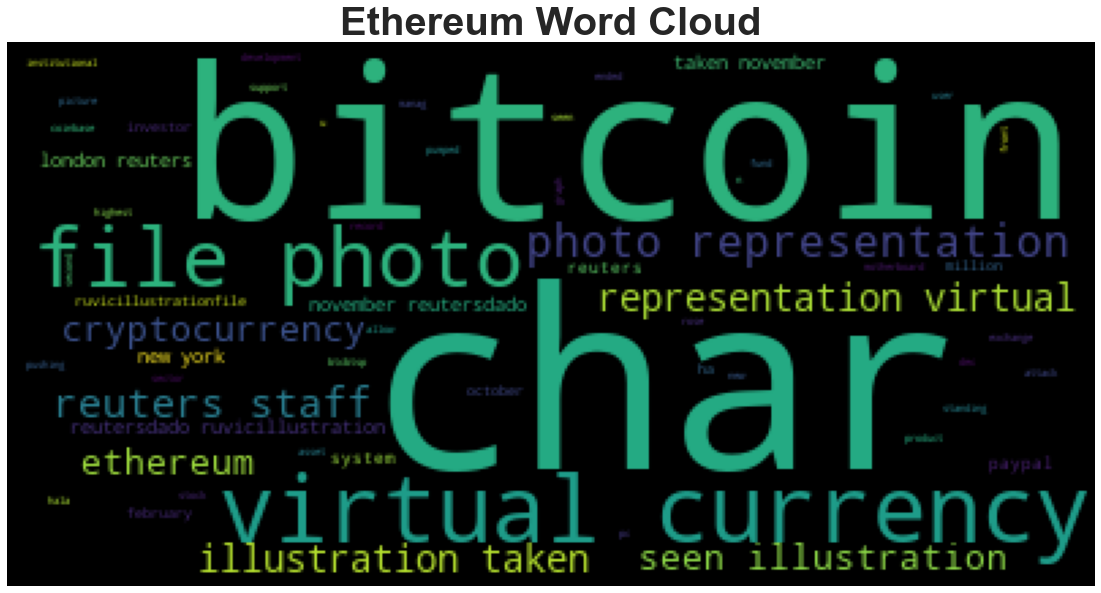

In [124]:
# Generate the Ethereum word cloud
ethereum_word_cloud = ' '.join(ethereum_processed)
wc = WordCloud().generate(ethereum_word_cloud)
plt.title('Ethereum Word Cloud', fontsize=40, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis('off')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [125]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [126]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [131]:
# Concatenate all of the bitcoin text together
bitcoin_big_string

"Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars] If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decent

In [135]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_doc.user_data['title'] = "Bitcoin NER"


In [136]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [147]:
# List all Entities
from pprint import pprint
pprint([(ent.text, ent.label_) for ent in bitcoin_doc.ents])

[('Visa', 'ORG'),
 ('first', 'ORDINAL'),
 ('Bitcoin', 'GPE'),
 ('PayPal', 'PRODUCT'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('US', 'GPE'),
 ('October', 'DATE'),
 ('November 2017', 'DATE'),
 ('two-month', 'DATE'),
 ('Bitcoin', 'GPE'),
 ('10,000', 'MONEY'),
 ('first', 'ORDINAL'),
 ('the next 20 days', 'DATE'),
 ('19,665', 'MONEY'),
 ('digital yuan', 'ORG'),
 ('the People’s Bank of China', 'ORG'),
 ('the past few weeks', 'DATE'),
 ('bitcoin', 'GPE'),
 ('digital', 'ORG'),
 ('hype', 'GPE'),
 ('Six years', 'DATE'),
 ('Mexico', 'GPE'),
 ('$62 million', 'MONEY'),
 ('Decentralized', 'GPE'),
 ('4', 'CARDINAL'),
 ('U.S.', 'GPE'),
 ('November', 'DATE'),
 ('today', 'DATE'),
 ('500', 'CARDINAL'),
 ('10.8 percent', 'PERCENT'),
 ('November', 'DATE'),
 ('monthly', 'DATE'),
 ('April', 'DATE'),
 ('fourth', 'ORDINAL'),
 ('Maisie Williams', 'PERSON'),
 ('Arya Stark', 'PERSON'),
 ('Lady Catelyn', 'PERSON'),
 ('Eddard', 'PERSON'),
 ('acolyte', 'PERSON'),
 ('the Faceless Men', 'WORK_OF_ART'),
 ('Monday', 'D

---

## Ethereum NER

In [148]:
# Concatenate all of the ethereum text together
ethereum_big_string

"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the

In [149]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)

# Add a title to the document
ethereum_doc.user_data['title'] = "Ethereum NER"

In [150]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [151]:
# List all Entities
pprint([(ent.text, ent.label_) for ent in ethereum_doc.ents])

[('PayPal', 'PRODUCT'),
 ('US', 'GPE'),
 ('first', 'ORDINAL'),
 ('US', 'GPE'),
 ('October', 'DATE'),
 ('February 3, 2018', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('Reuters', 'ORG'),
 ('February 3, 2018', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('Reuters', 'ORG'),
 ('LONDON', 'GPE'),
 ('Reuters', 'ORG'),
 ('XRP', 'ORG'),
 ('Monday', 'DATE'),
 ('NEW YORK', 'PERSON'),
 ('Reuters', 'ORG'),
 ('$429 million', 'MONEY'),
 ('the week ended Dec. 7', 'DATE'),
 ('second', 'ORDINAL'),
 ('NEW YORK', 'PERSON'),
 ('Reuters', 'ORG'),
 ('$429 million', 'MONEY'),
 ('the week ended Dec. 7', 'DATE'),
 ('second', 'ORDINAL'),
 ('PayPal', 'PERSON'),
 ('the Generosity Network', 'ORG'),
 ('20,000', 'MONEY'),
 ('Reuters', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('November 19, 2020', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('Reuters', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('November 19, 2020', 'DATE'),
 ('REUTERS/', 'ORG'),
 ('The New York Times', 'ORG'),
 ('Coinbase', 'ORG'),
 ('early February this year', 'DATE'),
 ('last month', 'DATE'),
 ('October', 